In [1]:
## In this analaysis, I will practise my Multiple Linear Regression that I have learnt previously
## Data source are from kaggle

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = (r"C:\Users\user\Desktop\Kaggle\kc_house_data.csv")
df = pd.read_csv(data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
## Here, I will drop a few columns that are unnecessarily to my analysis
df = df.drop(["id", "yr_renovated", "zipcode", "lat", "long"], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


In [13]:
## I will only use 1 year data to do my analysis which is date = 2014
## This is because the price of house will affected by inflation

df = df[df['date'].str.contains("2014")]

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,4760,101930
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,2238,6819


In [18]:
## Since the datasets contains only 2014 data, I can now drop the date columns

df = df.drop(["date"], axis = 1 )

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,2238,6819


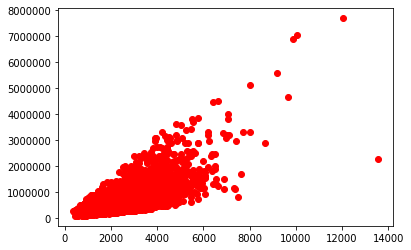

In [45]:
## Try Simple Linear regression here
from sklearn import linear_model
## Set the train and test model here 

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.sqft_living, train.price, color = "red")
plt.show()


In [51]:
## Seems like there is a proportional relationship between sqft_living and price
## Try the multi linear regression now

regr = linear_model.LinearRegression()
x = np.asanyarray(train[["bathrooms", "bedrooms", "floors", "yr_built"]])
y = np.asanyarray(train[["price"]])
regr.fit (x, y)

print("Coefficients:", regr.coef_)

Coefficients: [[311790.40523648   4655.54068869  57101.65681081  -3840.93846063]]


In [53]:
## Prediction here to find the RSS and Variance

y_hat= regr.predict(df[["bathrooms", "bedrooms", "floors", "yr_built"]])
x = np.asanyarray(df[["bathrooms", "bedrooms", "floors", "yr_built"]])
y = np.asanyarray(df[["price"]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 88764677214.13
Variance score: 0.35


In [54]:
## As the lower the Residual sum of squares the better, I will now try using different variables from the datasets
## To see if the RSS is reduced

# write your code here
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["bathrooms", "bedrooms", "grade"]])
y = np.asanyarray(train[['price']])

regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[["bathrooms", "bedrooms", "grade"]])
x = np.asanyarray(test[["bathrooms", "bedrooms", "grade"]])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[ 73073.03259127  14426.14393739 178924.01991195]]
Residual sum of squares: 57601810950.06
Variance score: 0.47


In [55]:
## The RSS has reduced a lot means that the second regression fit the model more well compare to the first model